<a href="https://colab.research.google.com/github/sucharitha93/EIP4/blob/master/Week%203/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


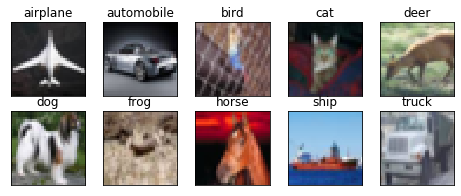

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)       

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':





Epoch 1/50





390/390 [==============================] - 28s 73ms/step - loss: 1.8848 - acc: 0.2791 - val_loss: 1.4857 - val_acc: 0.4565
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3628 - acc: 0.5019 - val_loss: 1.1534 - val_acc: 0.5843
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1371 - acc: 0.5955 - val_loss: 0.9573 - val_acc: 0.6584
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9950 - acc: 0.6559 - val_loss: 0.9056 - val_acc: 0.6883
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8979 - acc: 0.6895 - val_loss: 0.7754 - val_acc: 0.7290
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8137 - acc: 0.7218 - val_loss: 0.8355 - val_acc: 0.7138
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7673 - acc: 0.7370 - val_loss: 0.7101 - val_acc: 0.7560
Epoch 8/50
390/390 [==============================] - 

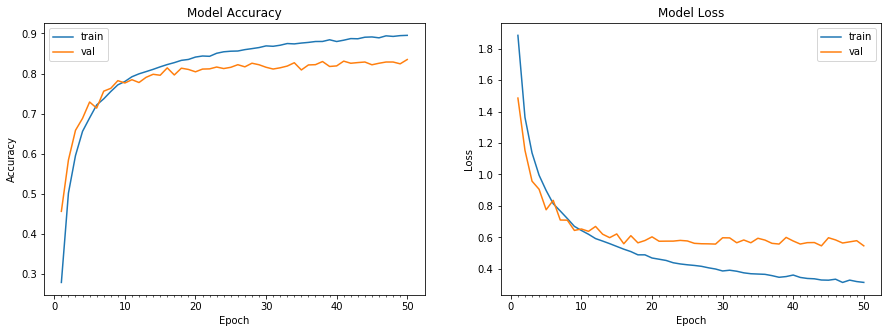

Accuracy on test data is: 83.49


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D,SeparableConv2D, DepthwiseConv2D,AveragePooling2D, Conv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.utils import np_utils

In [0]:
from keras.regularizers import l2
d_m=1
opt=Adam(lr=0.005)
l2val=0.0001

def scheduler(epoch, lr):
  if epoch>=30:
    return round(0.005 * 1/(1 + 0.319 * (epoch-29)), 10)

  else:
    return lr


###############
model1=Sequential()

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), padding='valid',depth_multiplier=5, activation='relu',input_shape=(32, 32, 3),use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(32,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Dropout(0.05))
model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), padding='valid',depth_multiplier=5, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(32,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(DepthwiseConv2D(kernel_size=3, strides=1, dilation_rate=2,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Dropout(0.1))
#########################################################################
model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=2,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=2,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(128,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())
##########################################################################
model1.add(Dropout(0.1))

model1.add(DepthwiseConv2D(kernel_size=3, strides=1, dilation_rate=2,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(128,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(DepthwiseConv2D(kernel_size=3, strides=1, dilation_rate=2,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(128,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())


#############################################################################

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=2,padding='valid',depth_multiplier=d_m, activation=None,use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(Conv2D(256,1,activation=None,use_bias=False,kernel_regularizer=l2(l2val)))

model1.add(AveragePooling2D(4))
model1.add(Conv2D(10,1,use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(Flatten())

model1.add(Activation('softmax'))

model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_1 (Depthwis (None, 30, 30, 15)        135       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        480       
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
depthwise_conv2d_2 (Depthwis (None, 28, 28, 160)       14

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=50)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 71s 732ms/step - loss: 1.5543 - acc: 0.4628 - val_loss: 6.1498 - val_acc: 0.2588
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 60s 621ms/step - loss: 1.1825 - acc: 0.6063 - val_loss: 4.7002 - val_acc: 0.3436
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 61s 631ms/step - loss: 1.0495 - acc: 0.6542 - val_loss: 3.0088 - val_acc: 0.4330
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 61s 629ms/step - loss: 0.9679 - acc: 0.6858 - val_loss: 2.5784 - val_acc: 0.4849
Epoch 5/50

Epoch 00005: LearningRateSch

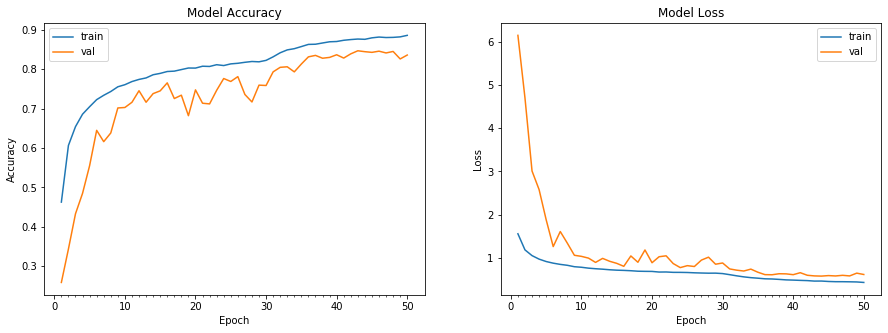

Accuracy on test data is: 83.59


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( 
                             horizontal_flip=True,
                             width_shift_range=(2/32),
                             height_shift_range=(2/32),
                             rotation_range=10,
                             shear_range=0.1,
                             zoom_range=0.1,
                             featurewise_center=0,
                             featurewise_std_normalization=0
                             )


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                  callbacks=[LearningRateScheduler(scheduler,verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))

In [0]:
from keras.regularizers import l2
d_m=1
opt=Adam(lr=0.005)
l2val=0.0001
def scheduler(epoch, lr):
  if epoch>=30:
    return round(0.005 * 1/(1 + 0.319 * (epoch-29)), 10)

  else:
    return lr
'''    
def scheduler(epoch, lr):
  if epoch<=20:
    return round(0.0005 * 1/(1 + 0.319 * epoch), 10)
  elif epoch%5==0:
    return round(0.0005 * 1/(1 + 0.319 * epoch), 10)
  else:
    return round(0.0004 * 1/(1 + 0.319 * epoch), 10)
'''
###############
model1=Sequential()
#add dropout..........
model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), padding='same',depth_multiplier=5, activation='relu',input_shape=(32, 32, 3),use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(32,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Dropout(0.05))
model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), padding='same',depth_multiplier=5, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(32,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(DepthwiseConv2D(kernel_size=3, strides=2, dilation_rate=1,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Dropout(0.1))

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=1,padding='same',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=1,padding='same',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())
model1.add(Conv2D(64,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Dropout(0.1))

model1.add(DepthwiseConv2D(kernel_size=3, strides=2, dilation_rate=1,padding='valid',depth_multiplier=d_m, activation='relu',use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(Conv2D(128,1,activation='relu',use_bias=False,kernel_regularizer=l2(l2val)))
model1.add(BatchNormalization())

model1.add(DepthwiseConv2D(kernel_size=3, strides=(1, 1), dilation_rate=1,padding='same',depth_multiplier=d_m, activation=None,use_bias=False,depthwise_regularizer=l2(l2val)))
model1.add(Conv2D(256,1,activation=None,use_bias=False,kernel_regularizer=l2(l2val)))

model1.add(AveragePooling2D(7))
model1.add(Conv2D(10,1,use_bias=False))
model1.add(Flatten())

model1.add(Activation('softmax'))

model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
depthwise_conv2d_9 (Depthwis (None, 32, 32, 15)        135       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 15)        60        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        480       
_________________________________________________________________
batch_normalization_16 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
depthwise_conv2d_10 (Depthwi (None, 32, 32, 160)       1440      
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 160)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, steps_per_epoch=97, epochs=50)`


Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '



Epoch 00001: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 50s 517ms/step - loss: 1.5647 - acc: 0.4405 - val_loss: 6.5255 - val_acc: 0.2425
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 47s 483ms/step - loss: 1.1872 - acc: 0.5909 - val_loss: 5.5625 - val_acc: 0.2803
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 47s 482ms/step - loss: 1.0474 - acc: 0.6470 - val_loss: 2.5029 - val_acc: 0.4488
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 47s 486ms/step - loss: 0.9564 - acc: 0.6817 - val_loss: 2.2782 - val_acc: 0.4771
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.004999999888241291.
97/97 [==============================] - 47s 486ms/st

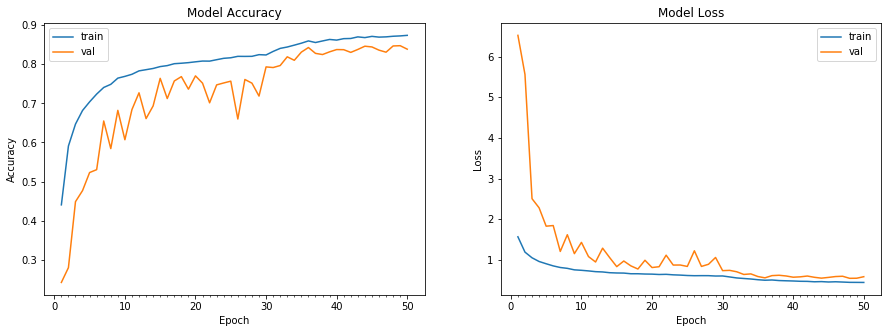

Accuracy on test data is: 83.83


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( 
                             horizontal_flip=True,
                             width_shift_range=(2/32),
                             height_shift_range=(2/32),
                             rotation_range=10,
                             shear_range=0.1,
                             zoom_range=0.1,
                             featurewise_center=True,
                             featurewise_std_normalization=True
                             )


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(train_features, train_labels, batch_size = 512),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                  callbacks=[LearningRateScheduler(scheduler,verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))